# 5、绘制逻辑回归的决策边界

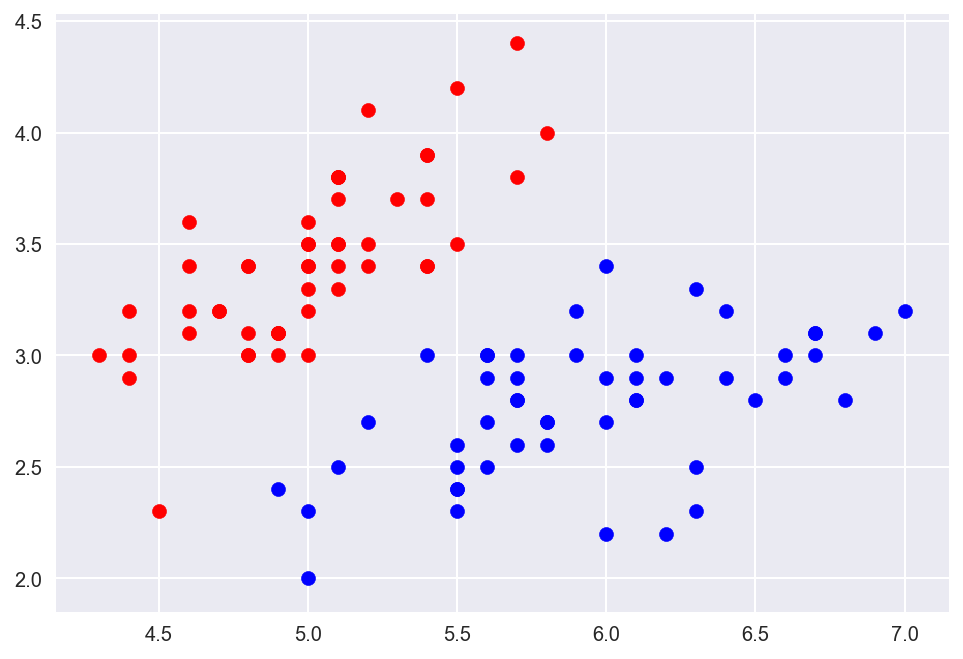

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
sns.set()


iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y < 2, :2]
y = y[y < 2]

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue")
plt.show()

因为我们的逻辑回归其实就是“线性回归 + sigmoid 函数”，所以同样可以得到回归系数，从而得到决策边界。

In [3]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [4]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

+ 下面，我们画出这个逻辑回归模型的决策边界。

+ 鸢尾花数据集只取前两个特征，前两个类别，在**训练数据集**上的逻辑回归模型预测效果。

In [5]:
log_reg.score(X_train, y_train)

0.9875

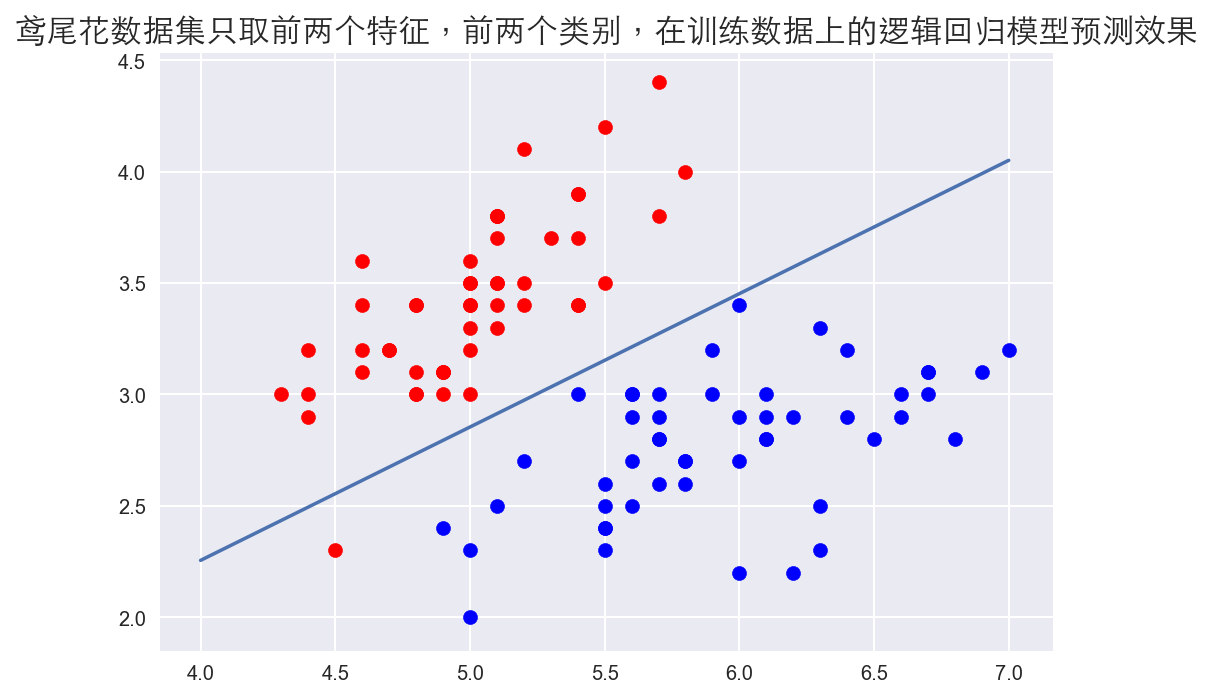

In [6]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc', size=16)


x1_plot = np.linspace(4, 7, 100)
x2_plot = -(log_reg.coef_[0] * x1_plot + log_reg.intercept_) / log_reg.coef_[1]

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.title('鸢尾花数据集只取前两个特征，前两个类别，在训练数据上的逻辑回归模型预测效果', fontproperties=font)
plt.show()

+ 鸢尾花数据集只取前两个特征，前两个类别，在测试数据上的逻辑回归模型预测效果。

In [7]:
log_reg.score(X_test, y_test)

1.0

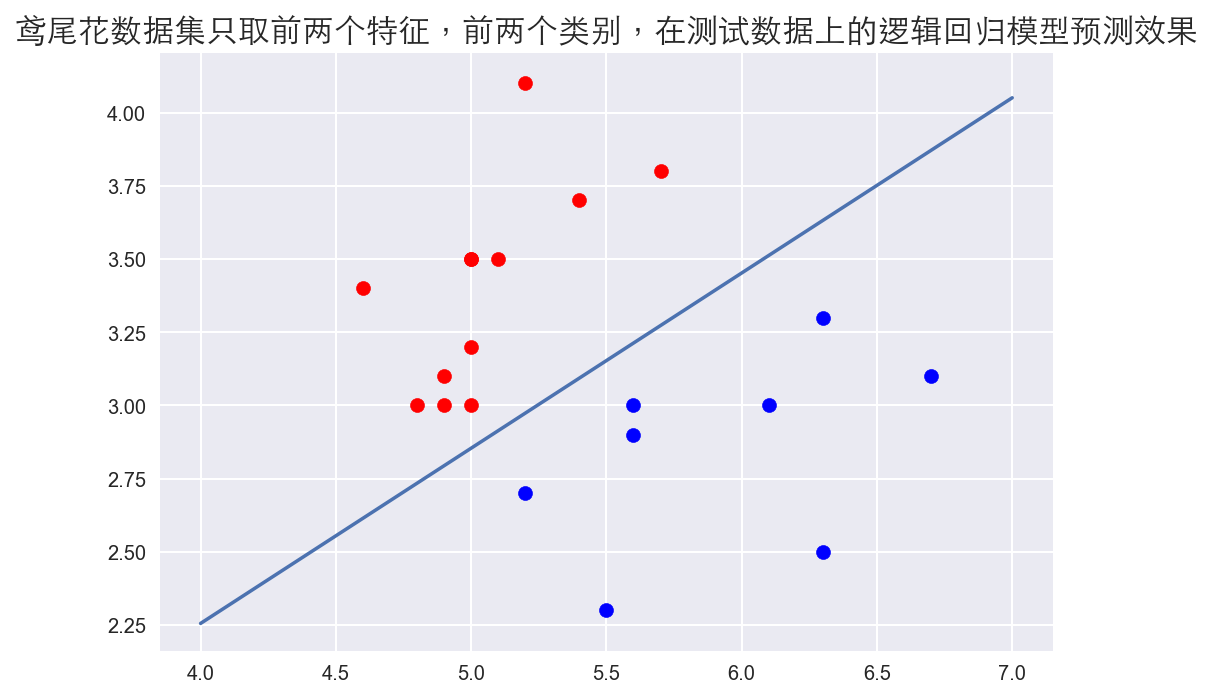

In [8]:
x1_plot = np.linspace(4, 7, 100)
x2_plot = -(log_reg.coef_[0] * x1_plot + log_reg.intercept_) / log_reg.coef_[1]

plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color="red")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color="blue")
plt.title('鸢尾花数据集只取前两个特征，前两个类别，在测试数据上的逻辑回归模型预测效果', fontproperties=font)
plt.plot(x1_plot, x2_plot)
plt.show()

然而并不是所有的分类模型，都像逻辑回归模型这样，有线性部分（即有 coef_ 和 intercept_），可以直接画出决策边界，那么一般意义上的决策边界如何画出来呢。

## 一般的分类问题如何画决策边界

+ 虽然叫画决策边界，但是我们做的事情其实是描点。
+ 其实，我们是通过把特征空间划分成密密麻麻的网格的方式，通过一个一个密密麻麻的点去做预测。
+ 所以，我们一般意义上，我们其实是在描点，而不是画决策边界。只不过描点以后，泾渭分明，感觉我们像是在画楚河汉界一样。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


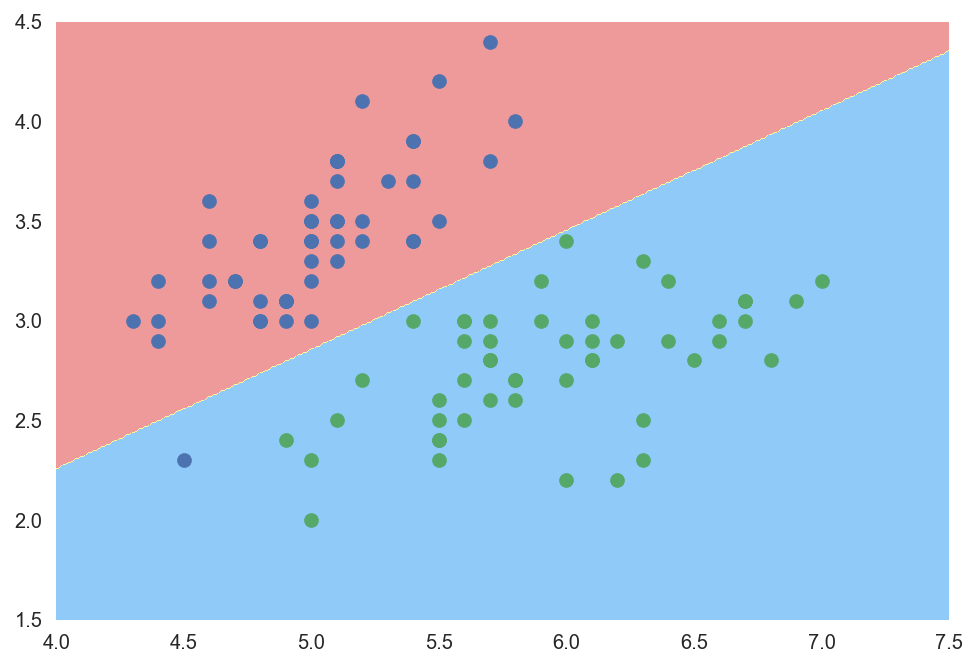

In [9]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

## kNN 模型的决策边界

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors=5 是默认值
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
knn_clf.score(X_test, y_test)

1.0

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


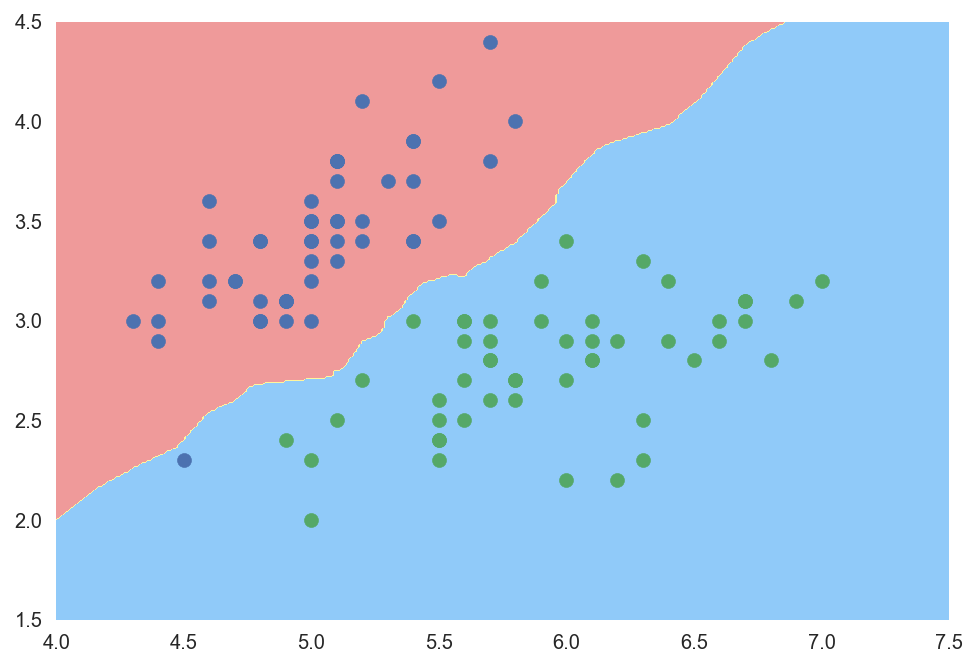

In [12]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

此时，通过逐个描点画出的决策边界就是曲线。

我们知道，kNN 模型天然就可以解决多分类问题，于是，我们可以把鸢尾花数据集全部类别都拿进来。但是为了可视化的方便，我们还是只取前两个特征。

## n_neighbors=5 时候绘制决策边界

In [13]:
# 查看文档可知 n_neighbors=5 是默认值
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


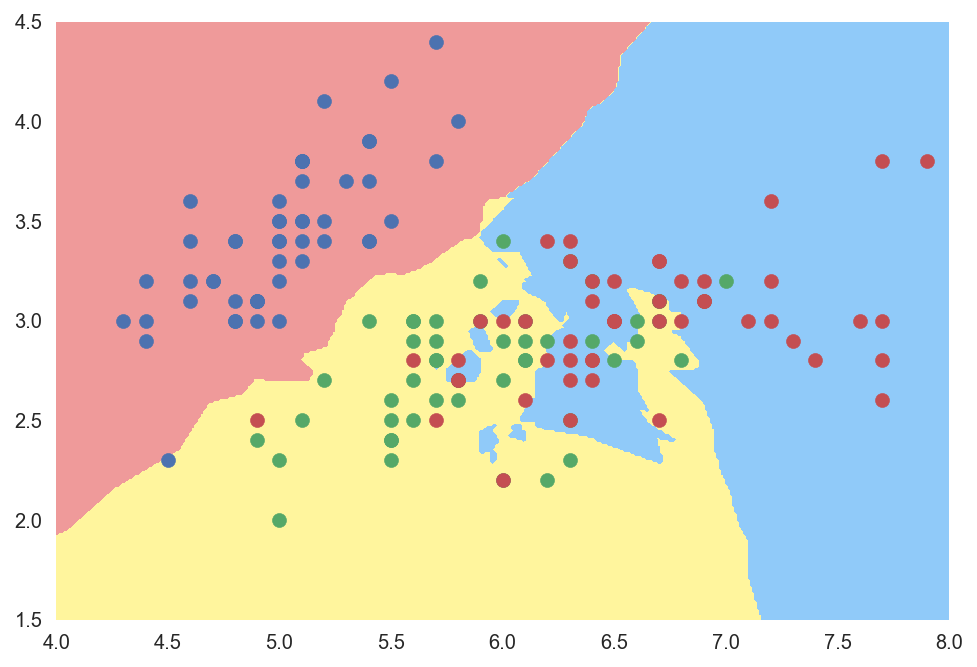

In [14]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target == 0, 0], iris.data[iris.target == 0, 1])
plt.scatter(iris.data[iris.target == 1, 0], iris.data[iris.target == 1, 1])
plt.scatter(iris.data[iris.target == 2, 0], iris.data[iris.target == 2, 1])
plt.show()

## n_neighbors=1 时候绘制决策边界

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


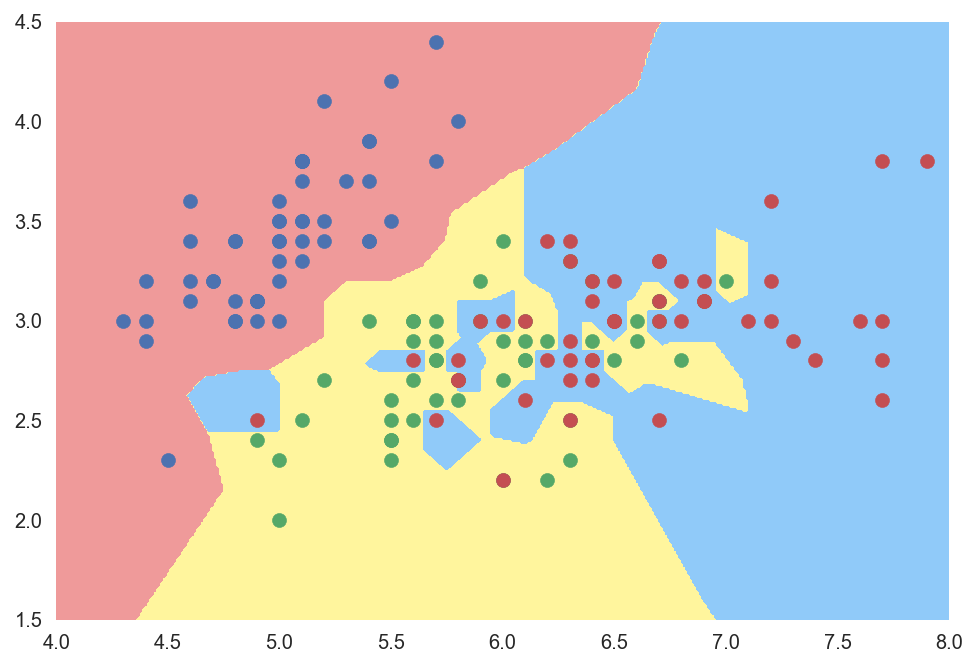

In [15]:
# 取极端，n_neighbors=1 的时候，此时模型最复杂，决策边界就有棱角
knn_clf_all = KNeighborsClassifier(n_neighbors=1)
knn_clf_all.fit(iris.data[:, :2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target == 0, 0], iris.data[iris.target == 0, 1])
plt.scatter(iris.data[iris.target == 1, 0], iris.data[iris.target == 1, 1])
plt.scatter(iris.data[iris.target == 2, 0], iris.data[iris.target == 2, 1])
plt.show()

## n_neighbors=50 时候绘制决策边界

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


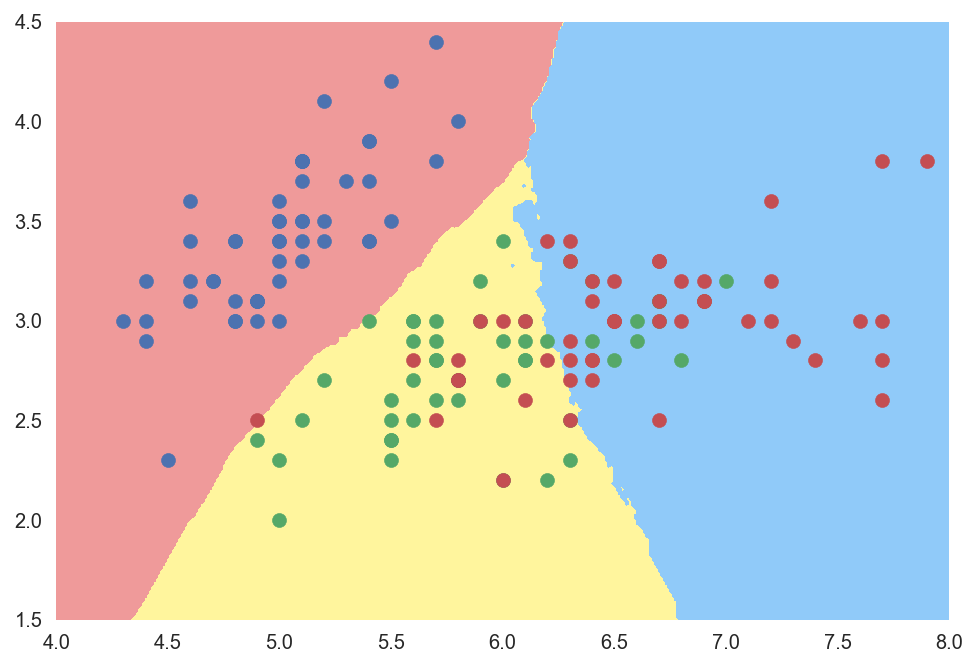

In [16]:
# 取极端，n_neighbors=50 的时候，此时模型最简单，决策边界就比较规整
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target == 0, 0], iris.data[iris.target == 0, 1])
plt.scatter(iris.data[iris.target == 1, 0], iris.data[iris.target == 1, 1])
plt.scatter(iris.data[iris.target == 2, 0], iris.data[iris.target == 2, 1])
plt.show()

## 总结

对于 kNN 模型来说，模型越复杂（$k$ 很小），决策边界就显得越不规整，则越容易出现过拟合的现象。
模型越简单（$k$ 很大），决策边界就比较简单清楚。